In [1]:
import tensorflow as tf

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import relu, sigmoid, softmax
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D

import matplotlib.pyplot as plt

# load the mnist dataset
mnist = tf.keras.datasets.mnist
# load the dataset and split it into train and test data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# tmp variable for plotting the data
x_train_drawing = x_train

# imgs size (28 x 28 Pixel)
img_rows = 28
img_cols = 28

# reshape the data 
# input is the image (a 1d array of numbers [123]), result is a 2d array [[123]]
input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) # x_train.shape[0] = length of train data (60.000)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# scales data from 0 to 1
x_train = x_train / 255 # 255 because of greyscaled images (e.g. black 0 - white 255)
x_test = x_test / 255

(60000, 28, 28)


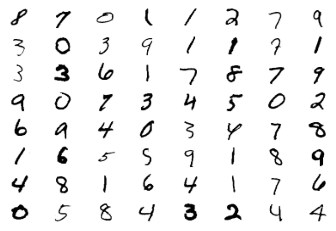

In [2]:
# the data
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(x_train_drawing[randint(0, x_train.shape[0])], cmap='Greys')

In [3]:
# creates a linear stack of layers
model = Sequential()

# add a layer to the model
model.add(
    # create a 2D convolution layer
    Conv2D(
        input_shape = input_shape, # only needed in the input layer
        
        # required parameters
        filters = 1,
        kernel_size = (3, 3), 
        
        # optional parameters
        activation = relu, # applies the rectified linear unit activation function, default is the linear activation function

        # strides = (1, 1), # for specifying the strides of the convolution along the height and width
        # padding = 'valid', # one of "valid" or "same", same results in an output with the same size as the input
        # dilation_rate = (1, 1), # specifying the dilation rate to use for dilated convolution
        # use_bias = True, # Boolean, whether the layer uses a bias vector
        # kernel_initializer = 'glorot_uniform', # Initializer for the kernel weights matrix
        # bias_initializer = 'zeros', # Initializer for the bias vector
        # kernel_regularizer = None, # Regularizer function applied to the kernel weights matrix
        # bias_regularizer = None, # Regularizer function applied to the bias vector
        # activity_regularizer = None, # Regularizer function applied to the output of the layer (its "activation")
        # kernel_constraint = None, # Constraint function applied to the kernel matrix
        # bias_constraint = None, # Constraint function applied to the bias vector
        ))

# add a second layer to the model
model.add(
    # flattens the Conv2D layer from a 2d-array to a 1d-array (because a dense layer needs a 1d-array)
    Flatten()
    )

# add a third layer to the model -> last layer = output layer
model.add(
    # regular fully-connected NN layer
    Dense(
        units=10, # dimensionality of the output space -> how many classes we want to predict
        activation=sigmoid) # applies the sigmoid activation function
    )

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 1)         10        
_________________________________________________________________
flatten (Flatten)            (None, 676)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                6770      
Total params: 6,780
Trainable params: 6,780
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(
    # adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments
    optimizer = Adam(),  
    # computes the crossentropy loss between the labels and predictions. Use this crossentropy loss function when there are two or more label classes
    loss = SparseCategoricalCrossentropy(),
    # metrics to be evaluated by the model during training and testing
    metrics = ["accuracy"]
)

model.fit(
    x = x_train,
    y = y_train,
    batch_size = 32, # Number of samples per gradient update. If unspecified, batch_size will default to 32
    epochs = 1, # Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
    verbose = 1, # Show progress
    validation_data = (x_test, y_test) # Data on which to evaluate the loss and any model metrics at the end of each epoch
)

score = model.evaluate(x_test, y_test)

print("\n")
print("Test loss: {:.2f}".format(score[0]))
print("Test accuracy: {:.2f} %".format(score[1]))

Train on 60000 samples, validate on 10000 samples
10000/10000 [==============================] - 1s 54us/sample - loss: 0.2898 - accuracy: 0.9186


Test loss: 0.29
Test accuracy: 0.92 %


In [5]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation=relu, input_shape=input_shape),
    Conv2D(filters=64, kernel_size=(3, 3), activation=relu),
    MaxPool2D(), # Max pooling operation for spatial data
    Dropout(0.25), # Dropout consists in randomly setting a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting
    Flatten(),
    Dense(512, activation=relu),
    Dropout(0.5),
    Dense(10, activation=softmax)
])

model.compile(
    optimizer = Adam(), loss = SparseCategoricalCrossentropy(), metrics = [["accuracy", "mse"]]
)

model.fit(
    x = x_train,
    y = y_train,
    batch_size = 32,
    epochs = 1,
    verbose = 1,
    validation_data = (x_test, y_test)
)

score = model.evaluate(x_test, y_test)

print("\n")
print("Test loss: {:.2f}".format(score[0]))
print("Test accuracy: {:.2f} %".format(score[1]))
print("Test mse: {}".format(score[2]))

Train on 60000 samples, validate on 10000 samples
10000/10000 [==============================] - 4s 425us/sample - loss: 0.0393 - accuracy: 0.9866 - mse: 27.3378


Test loss: 0.04
Test accuracy: 0.99 %
Test mse: 27.3377685546875
